# Project: Data Science Blog Post - Stack Overflow 2025 Developer Survey


### Introduction

   [The Stack Overflow Developer Survey](https://survey.stackoverflow.co/) is one of the largest annual studies of the global tech workforce, capturing insights from hundreds of thousands of developers across dozens of countries. It provides a comprehensive look at technologies, roles, salaries, and workplace trends shaping the modern software industry. This dataset serves as a valuable resource for analyzing tech career patterns, compensation, and the evolving skills demanded in the field.

### Motivation
   The European tech industry is evolving rapidly, driven by advancements in data science, AI, and flexible work arrangements. As we approach 2025, understanding how these changes influence employee compensation is essential for both professionals planning their careers and organizations shaping competitive hiring strategies. By analyzing the Stack Overflow Developer Survey, this project aims to uncover salary trends among European tech workers, offering insights into how roles, skills, and work environments impact earnings.


### 1. Business Understanding

   This project focuses on understanding the key factors that shape tech salaries in Europe. To guide the analysis, the following business questions are defined:

   1. How do salaries differ between traditional software developers and professionals working in data and AI-related roles?

   2. How does the work arrangement (remote, hybrid, or in-person) influence salary levels?

   3. What are the key factors that most significantly influence salary?


### 2. Data Understanding

In [99]:
# Importing all necessary libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the dataset
   
data_folder = Path.cwd() 
file_path = data_folder / "survey_results_public.csv"
df = pd.read_csv(file_path)

# Display the first rows
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.00,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.00,10.00
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.00,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.00,9.00
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.00,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.00,8.00
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.00,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.00,6.00
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.00,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.00,7.00


In [100]:
# Checking the dataset dimensions 
df.shape

(49123, 170)

   Since the dataset is extensive and not all fields are needed, the next step is to extract only the columns relevant to our analysis.

In [3]:
# List of columns to keep
columns_to_keep = [
    "ResponseId",
    "MainBranch",
    "Employment",
    "RemoteWork",
    "EdLevel",
    "YearsCode",
    "DevType",
    "OrgSize",
    "Country",
    "WorkExp",
    "ConvertedCompYearly",
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "DevEnvsHaveWorkedWith",
    "AIModelsHaveWorkedWith"
]

df_subset = df[columns_to_keep].copy()

df_subset.head()

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,DevType,OrgSize,Country,WorkExp,ConvertedCompYearly,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,DevEnvsHaveWorkedWith,AIModelsHaveWorkedWith
0,1,I am a developer by profession,Employed,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,"Developer, mobile",20 to 99 employees,Ukraine,8.0,61256.0,Bash/Shell (all shells);Dart;SQL,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,Android Studio;Notepad++;Visual Studio;Visual ...,openAI GPT (chatbot models);openAI Image gener...
1,2,I am a developer by profession,Employed,"Hybrid (some in-person, leans heavy to flexibi...","Associate degree (A.A., A.S., etc.)",10.0,"Developer, back-end",500 to 999 employees,Netherlands,2.0,104413.0,Java,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,IntelliJ IDEA;PyCharm;Visual Studio Code;Xcode,openAI GPT (chatbot models)
2,3,I am a developer by profession,"Independent contractor, freelancer, or self-em...",NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,"Developer, front-end",NaN,Ukraine,10.0,53061.0,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,Visual Studio Code,Gemini (Flash general purpose models);openAI G...
3,4,I am a developer by profession,Employed,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,"Developer, back-end","10,000 or more employees",Ukraine,4.0,36197.0,Java;Kotlin;SQL,NaN,Amazon Web Services (AWS);Google Cloud,Spring Boot,NaN,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,Engineering manager,NaN,Ukraine,21.0,60000.0,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Eclipse;IntelliJ IDEA;Jupyter Notebook/Jupyter...,openAI GPT (chatbot models)


In [4]:
# Checking the dataset dimensions 
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (49123, 170)


In [5]:
# Checking the dataset types
df_subset.dtypes

ResponseId                  int64
MainBranch                 object
Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCode                 float64
DevType                    object
OrgSize                    object
Country                    object
WorkExp                   float64
ConvertedCompYearly       float64
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
WebframeHaveWorkedWith     object
DevEnvsHaveWorkedWith      object
AIModelsHaveWorkedWith     object
dtype: object

In [6]:
# Summary for numeric columns

# Select numeric columns
numeric_cols = ["YearsCode", "WorkExp", "ConvertedCompYearly"]

df[numeric_cols].describe()


,YearsCode,WorkExp,ConvertedCompYearly
count,43000.000000,42844.000000,2.392800e+04
mean,16.575256,13.370810,1.017916e+05
std,11.789269,10.801917,4.619345e+05
min,1.000000,1.000000,1.000000e+00
25%,8.000000,5.000000,3.817100e+04
50%,14.000000,10.000000,7.538350e+04
75%,24.000000,20.000000,1.206302e+05
max,100.000000,100.000000,5.000000e+07


Verify the missing values 

In [7]:
# Number of missing values per column

df_subset.isnull().sum()

ResponseId                    0
MainBranch                    0
Employment                  846
RemoteWork                15376
EdLevel                    1036
YearsCode                  6123
DevType                    5487
OrgSize                   14979
Country                   13721
WorkExp                    6279
ConvertedCompYearly       25195
LanguageHaveWorkedWith    17480
DatabaseHaveWorkedWith    23595
PlatformHaveWorkedWith    24889
WebframeHaveWorkedWith    26153
DevEnvsHaveWorkedWith     23129
AIModelsHaveWorkedWith    32862
dtype: int64

Inspect categorical variables (needed for 1 & 2 questions)

In [8]:
cat_cols = [
    "MainBranch",
    "Employment",
    "RemoteWork",
    "EdLevel",
    "DevType",
    "OrgSize",
    "Country"
]


# Print the unique values for each column
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].unique())

    


--- MainBranch ---
['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am'
 'I code primarily as a hobby'
 'I work with developers or my work supports developers but am not a developer by profession'
 'I am learning to code']

--- Employment ---
['Employed' 'Independent contractor, freelancer, or self-employed'
 'Student' 'Retired' 'Not employed' 'I prefer not to say' nan]

--- RemoteWork ---
['Remote' 'Hybrid (some in-person, leans heavy to flexibility)' nan
 'In-person' 'Hybrid (some remote, leans heavy to in-person)'
 'Your choice (very flexible, you can come in when you want or just as needed)']

--- EdLevel ---
['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 '

### 3. Data Preparation

In [9]:
# Drop na values 

df_filtered = df_subset.dropna()

# Check new shape
df_filtered.shape

print("Original rows:", df_subset.shape[0])
print("After dropna:", df_filtered.shape[0])
print("Rows removed:", df_subset.shape[0] - df_filtered.shape[0])

df_subset.isnull().sum()
df_filtered.isnull().sum()

Original rows: 49123
After dropna: 6923
Rows removed: 42200


ResponseId                0
MainBranch                0
Employment                0
RemoteWork                0
EdLevel                   0
YearsCode                 0
DevType                   0
OrgSize                   0
Country                   0
WorkExp                   0
ConvertedCompYearly       0
LanguageHaveWorkedWith    0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
DevEnvsHaveWorkedWith     0
AIModelsHaveWorkedWith    0
dtype: int64

In [10]:
df_filtered = df_filtered.copy()

multi_cols = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "DevEnvsHaveWorkedWith",
    "AIModelsHaveWorkedWith"
]

for col in multi_cols:
    df_filtered.loc[:, col + "_count"] = (
        df_filtered[col]
        .fillna("")
        .apply(lambda x: 0 if x == "" else len(x.split(";")))
    )



In [11]:
df_filtered[[col + "_count" for col in multi_cols]].head()


,LanguageHaveWorkedWith_count,DatabaseHaveWorkedWith_count,PlatformHaveWorkedWith_count,WebframeHaveWorkedWith_count,DevEnvsHaveWorkedWith_count,AIModelsHaveWorkedWith_count
1,1,2,7,1,4,1
7,6,3,7,2,3,1
10,5,4,3,1,4,3
29,11,4,10,3,7,2
35,5,5,10,8,3,3


In [12]:
# Mapping values from category variables 

# Mapping for MainBranch - for simplicity

mainbranch_mapping = {
    "I am a developer by profession": "Professional Developer",
    "I am not primarily a developer, but I write code sometimes as part of my work/studies": "Occasional Coder",
    "I code primarily as a hobby": "Hobbyist",
    "I used to be a developer by profession, but no longer am": "Former Developer",
    "I work with developers or my work supports developers but am not a developer by profession": "Non-Dev Tech Support",
    "I am learning to code": "Learning"
}

df_filtered = df_filtered.copy()  

df_filtered.loc[:, "MainBranch"] = (
    df_filtered["MainBranch"]
    .str.strip()    
    .map(mainbranch_mapping)
)

print("Main Branch categories: ", df_filtered['MainBranch'].unique())

Main Branch categories:  ['Professional Developer' 'Occasional Coder' 'Hobbyist' 'Former Developer'
 'Non-Dev Tech Support' 'Learning']


In [13]:
# Filtering the Employment column - keeping only current employees 

valid_employment = [
    "Employed",
    "Independent contractor, freelancer, or self-employed"
]

df_filtered = df_filtered[df_filtered["Employment"].isin(valid_employment)].copy()

In [14]:
df_filtered["Employment"].unique()

array(['Employed', 'Independent contractor, freelancer, or self-employed'],
      dtype=object)

In [15]:
# Mapping for RemoteWork - for simplicity

remote_mapping = {
    "Remote": "Remote",
    "Your choice (very flexible, you can come in when you want or just as needed)": "Remote",
    "Hybrid (some in-person, leans heavy to flexibility)": "Hybrid",
    "Hybrid (some remote, leans heavy to in-person)": "Hybrid",
    "In-person": "In-person"
}

df_filtered = df_filtered.copy()

df_filtered.loc[:, "RemoteWork"] = (
    df_filtered["RemoteWork"]
    .str.strip()
    .map(remote_mapping)
)

print("Remote Work categories: ", df_filtered['RemoteWork'].unique())


Remote Work categories:  ['Hybrid' 'Remote' 'In-person']


In [16]:
# Mapping for EdLevel

def map_edlevel(x):
    if pd.isna(x):
        return "Other"
    
    x = x.lower()
    
    if "bachelor" in x:
        return "Bachelor"
    elif "master" in x:
        return "Master"
    elif any(term in x for term in ["professional", "ph.d", "doctor", "jd", "md", "ed.d"]):
        return "Doctorate/Professional"
    elif "associate" in x or "some college" in x:
        return "Associate/College"
    elif "secondary" in x or "primary" in x or "high school" in x:
        return "High School or Below"
    else:
        return "Other"


In [17]:
df_filtered = df_filtered.copy()

df_filtered.loc[:, "EdLevel"] = df_filtered["EdLevel"].apply(map_edlevel)

In [18]:
df_filtered["EdLevel"].unique()

array(['Associate/College', 'Doctorate/Professional', 'Master',
       'Bachelor', 'High School or Below', 'Other'], dtype=object)

In [19]:
# Mapping for DevType

# Define the function for mapping

def map_devtype(x):
    if pd.isna(x):
        return "Other"
    
    x = x.lower()
    
    # 1. Data / AI
    if any(term in x for term in [
        "data scientist", "data or business analyst", "data engineer",
        "ai/ml engineer", "ai apps", "applied scientist", "physical ai",
        "developer, ai apps or physical ai" 
    ]):
        return "Data/AI"
    
    # 2. Software Development
    if any(term in x for term in [
        "developer", "full-stack", "front-end", "back-end", "mobile",
        "embedded", "game", "desktop", "qa", "test"
    ]):
        return "Software Developer"
    
    # 3. Cloud / DevOps
    if any(term in x for term in [
        "devops", "cloud infrastructure", "sre"
    ]):
        return "Cloud/DevOps"
    
    # 4. IT Operations / SysAdmin / Security
    if any(term in x for term in [
        "system administrator", "support engineer", "analyst",
        "cybersecurity", "infosec", "database administrator"
    ]):
        return "IT Operations"
    
    # 5. Product / Project / Managerial Roles
    if any(term in x for term in [
        "project manager", "product manager", "engineering manager",
        "executive", "c-suite", "founder", "senior executive"
    ]):
        return "Management"
    
    # 6. Design / UX
    if any(term in x for term in [
        "ux", "ui", "design"
    ]):
        return "Design/UX"
    
    # 7. Academic / Research
    if any(term in x for term in [
        "academic researcher"
    ]):
        return "Research"
    
    # 8. Everything else
    return "Other"


In [20]:
df_filtered = df_filtered.copy()
df_filtered.loc[:, "DevType"] = df_filtered["DevType"].apply(map_devtype)

In [21]:
df_filtered["DevType"].unique()

array(['Software Developer', 'Other', 'Management', 'Research', 'Data/AI',
       'Cloud/DevOps', 'IT Operations', 'Design/UX'], dtype=object)

In [22]:
# Mapping for OrgSize

def map_orgsize(x):
    if pd.isna(x):
        return "Unknown"
    
    x = x.lower()
    
    if "just me" in x:
        return "Freelancer"
    if "less than 20" in x or "20 to 99" in x:
        return "Small"
    if "100 to 499" in x or "500 to 999" in x:
        return "Medium"
    if "1,000 to 4,999" in x:
        return "Large"
    if "5,000 to 9,999" in x or "10,000 or more" in x:
        return "Enterprise"
    if "i don’t know" in x or "i don't know" in x:
        return "Unknown"
    
    return "Unknown"


In [23]:
df_filtered = df_filtered.copy()
df_filtered.loc[:, "OrgSize"] = df_filtered["OrgSize"].apply(map_orgsize)

In [24]:
df_filtered["OrgSize"].unique()

array(['Medium', 'Small', 'Large', 'Enterprise', 'Freelancer', 'Unknown'],
      dtype=object)

In [25]:
# Mapping for Country - select only European countries 

european_countries = [
    'Ukraine', 'Netherlands', 'Georgia', 'Greece', 'Germany', 'Lithuania',
    'United Kingdom of Great Britain and Northern Ireland', 'Ireland', 'Sweden',
    'Austria', 'Belgium', 'Czech Republic', 'Italy', 'Hungary', 'Switzerland',
    'Poland', 'Spain', 'Russian Federation', 'Serbia', 'France', 'Romania',
    'Norway', 'Slovakia', 'Republic of Moldova', 'Portugal', 'Croatia',
    'Finland', 'Bulgaria', 'Denmark', 
    'Republic of North Macedonia', 'Cyprus', 'Latvia', 'Malta',
    'Luxembourg', 'Slovenia', 'Bosnia and Herzegovina', 'Armenia',
    'Montenegro', 'Estonia', 'Albania', 'Belarus', 'Kosovo',
    'Iceland', 'Andorra', 'Moldova', 'San Marino'
]

df_filtered = df_filtered[df_filtered["Country"].isin(european_countries)].copy()

df_filtered["Country"].unique()

array(['Netherlands', 'Ukraine', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland',
       'Switzerland', 'Sweden', 'Belgium', 'Norway', 'Spain', 'Hungary',
       'Republic of Moldova', 'France', 'Portugal', 'Austria', 'Ireland',
       'Russian Federation', 'Poland', 'Serbia', 'Georgia', 'Italy',
       'Czech Republic', 'Bulgaria', 'Republic of North Macedonia',
       'Romania', 'Finland', 'Denmark', 'Armenia', 'Greece', 'Croatia',
       'Estonia', 'Albania', 'Slovakia', 'Slovenia', 'Lithuania',
       'Cyprus', 'Latvia', 'Montenegro', 'Belarus', 'Malta', 'Andorra',
       'Bosnia and Herzegovina', 'Kosovo', 'Iceland'], dtype=object)

In [26]:
# Create a new column with regions 

# Define European regions

western_europe = [
    'Austria', 'Belgium', 'France', 'Germany', 
    'Netherlands', 'Switzerland', 'Luxembourg',
    'United Kingdom of Great Britain and Northern Ireland', 'Ireland'
]

central_europe = [
    'Poland', 'Czech Republic', 'Slovakia', 'Hungary',
    'Slovenia', 'Croatia'
]

northern_europe = [
    'Sweden', 'Norway', 'Finland', 'Denmark', 'Iceland',
    'Lithuania', 'Latvia', 'Estonia'
]

southern_europe = [
    'Spain', 'Italy', 'Portugal', 'Greece', 'Malta',
    'Cyprus', 'Andorra', 'San Marino'
]

eastern_europe = [
    'Ukraine', 'Romania', 'Bulgaria', 'Russian Federation',
    'Serbia', 'Republic of Moldova', 'Bosnia and Herzegovina',
    'Montenegro', 'Belarus', 'North Macedonia', 'Albania',
    'Armenia', 'Georgia', 'Moldova', 'Republic of North Macedonia', 'Kosovo'
]

In [27]:
def map_region(country):
    if country in western_europe:
        return "Western Europe"
    elif country in central_europe:
        return "Central Europe"
    elif country in northern_europe:
        return "Northern Europe"
    elif country in southern_europe:
        return "Southern Europe"
    elif country in eastern_europe:
        return "Eastern Europe"
    else:
        return "Other"


In [28]:
df_filtered = df_filtered.copy()

df_filtered.loc[:, "EuropeRegion"] = df_filtered["Country"].apply(map_region)

In [29]:
df_filtered["EuropeRegion"].unique()

array(['Western Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Central Europe'], dtype=object)

In [30]:
# Preparation for numeric variables 

# Display unique values for YearsCode

df_filtered["YearsCode"].unique()

array([10., 30.,  9., 21., 12., 25., 45., 15., 41., 24., 13., 26., 40.,
       32., 33.,  5., 16., 20., 31., 35., 29., 11., 14., 37., 23.,  6.,
        8., 42., 18., 27., 22., 28., 17.,  2.,  4., 38., 19., 43.,  7.,
        3., 36., 34., 39., 47., 50., 44., 46., 48.])

In [31]:
# Display basic statistics for YearsCode 

df_filtered["YearsCode"].describe()

count    3241.000000
mean       17.023758
std         9.125347
min         2.000000
25%        10.000000
50%        15.000000
75%        22.000000
max        50.000000
Name: YearsCode, dtype: float64

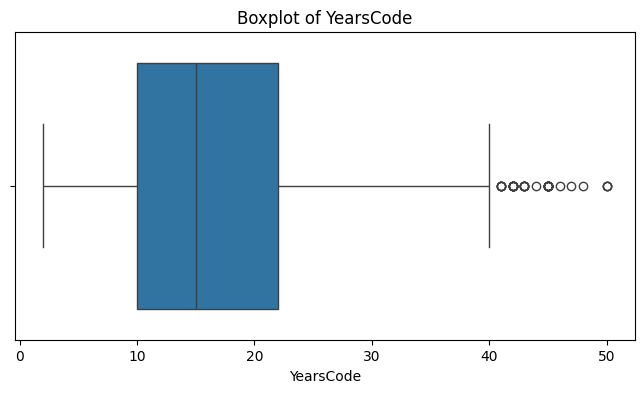

In [32]:
# Visualize outliers with a boxplot

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered["YearsCode"])
plt.title("Boxplot of YearsCode")
plt.show()

The boxplot shows that most respondents have between 5 and 25 years of coding experience, with the median around 15 years. There are several outliers beyond aprox. 45 years, indicating a small number of developers reporting unusually long coding experience, including extreme values near 60 and 100 years, which are likely unrealistic.

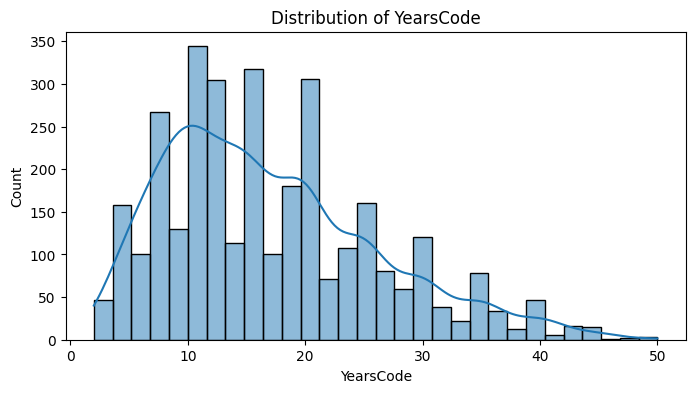

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df_filtered["YearsCode"], bins=30, kde=True)
plt.title("Distribution of YearsCode")
plt.show()


The histogram reveals a right-skewed distribution, with the majority of developers having 10–20 years of experience. The frequency gradually declines after 25 years, and only very few respondents report more than 40 years of experience. The long right tail confirms the presence of high outliers that stretch the distribution and could affect modeling.

In [34]:
# Identify the outliers 

Q1 = df_filtered["YearsCode"].quantile(0.25)
Q3 = df_filtered["YearsCode"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-8.0), np.float64(40.0))

In [35]:
# Show the outliers 

outliers = df_filtered[df_filtered["YearsCode"] > upper_bound]["YearsCode"].unique()
outliers


array([45., 41., 42., 43., 47., 50., 44., 46., 48.])

In [36]:
# Preview the rows with extreme values

df_filtered[df_filtered["YearsCode"] > upper_bound].head()


,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,DevType,OrgSize,Country,WorkExp,...,WebframeHaveWorkedWith,DevEnvsHaveWorkedWith,AIModelsHaveWorkedWith,LanguageHaveWorkedWith_count,DatabaseHaveWorkedWith_count,PlatformHaveWorkedWith_count,WebframeHaveWorkedWith_count,DevEnvsHaveWorkedWith_count,AIModelsHaveWorkedWith_count,EuropeRegion
73,74,Professional Developer,Employed,Hybrid,Master,45.0,Management,Small,United Kingdom of Great Britain and Northern I...,36.0,...,Django,Cursor;IntelliJ IDEA;Nano;PyCharm,Anthropic: Claude Sonnet;openAI GPT (chatbot m...,4,3,4,1,4,2,Western Europe
99,100,Professional Developer,Employed,Remote,High School or Below,41.0,Software Developer,Small,Germany,26.0,...,jQuery;Symfony,Claude Code;Notepad++;PhpStorm;PyCharm;Sublime...,Anthropic: Claude Sonnet;openAI GPT (chatbot m...,7,7,8,2,5,4,Western Europe
477,478,Professional Developer,Employed,Remote,Bachelor,42.0,Other,Small,Netherlands,35.0,...,Deno;FastAPI;Ruby on Rails,Aider;Neovim,Anthropic: Claude Sonnet;openAI GPT (chatbot m...,5,2,5,3,2,2,Western Europe
618,619,Professional Developer,Employed,Hybrid,Doctorate/Professional,42.0,Data/AI,Small,Germany,30.0,...,FastAPI;Flask;Symfony;Vue.js,Jupyter Notebook/JupyterLab;Vim;Visual Studio ...,Anthropic: Claude Sonnet;DeepSeek (R- Reasonin...,7,7,5,4,3,6,Western Europe
637,638,Professional Developer,Employed,In-person,Bachelor,41.0,Other,Small,Portugal,38.0,...,ASP.NET;ASP.NET Core;Deno;Express;FastAPI;Node...,Android Studio;Jupyter Notebook/JupyterLab;Nan...,DeepSeek (V- General purpose models);openAI GP...,10,4,9,7,6,2,Southern Europe


Based on the boxplot and histogram analysis, the majority of respondents report between 5 and 25 years of coding experience, while values above 50 years appear as extreme outliers that are unlikely to be realistic or representative. Since these high values can distort the distribution and negatively impact the analysis and modeling, I will keep only the observations with YearsCode ≤ 50, removing the extreme outliers.

In [37]:
# Remove the outliers from YearsCode

df_filtered = df_filtered[df_filtered["YearsCode"] <= 50].copy()

# Verify the result 

df_filtered["YearsCode"].describe()

count    3241.000000
mean       17.023758
std         9.125347
min         2.000000
25%        10.000000
50%        15.000000
75%        22.000000
max        50.000000
Name: YearsCode, dtype: float64

In [38]:
# Create Seniority variable based on YearsCode 

def map_seniority(years):
    if pd.isna(years):
        return None
    years = float(years)
    
    if years <= 2:
        return "Junior"
    elif years <= 7:
        return "Mid"
    elif years <= 15:
        return "Senior"
    elif years <= 30:
        return "Expert"
    else:
        return "Principal"


In [39]:
# Display unique values for WorkExp

df_filtered["WorkExp"].unique()

array([ 2., 22.,  7., 10., 15.,  6., 20.,  9., 36., 26., 21.,  4.,  8.,
       19., 30.,  1.,  5., 25., 13., 28., 16., 24., 11., 12., 17., 14.,
       23.,  3., 35., 18., 38., 27., 40., 32., 42., 29., 37., 34., 33.,
       45., 41., 31., 44.])

In [40]:
# Display basic statistics for WorkExp 

df_filtered["WorkExp"].describe()

count    3241.000000
mean       12.197470
std         8.041052
min         1.000000
25%         6.000000
50%        10.000000
75%        17.000000
max        45.000000
Name: WorkExp, dtype: float64

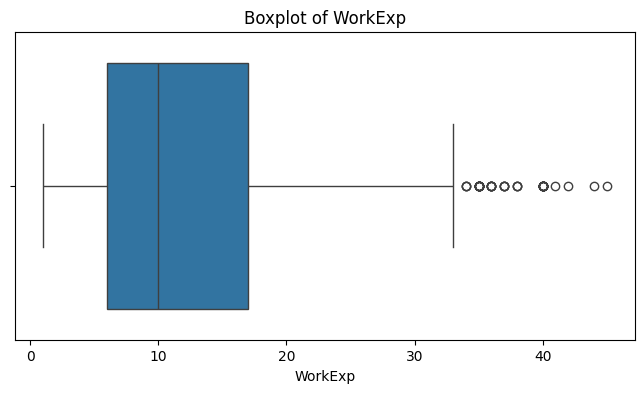

In [41]:
# Visualize outliers with a boxplot

plt.figure(figsize=(8,4))
sns.boxplot(x=df_filtered["WorkExp"])
plt.title("Boxplot of WorkExp")
plt.show()

The boxplot shows that most respondents have between 5 and 20 years of total work experience, with the median around 12 years. Values above 35 years appear as outliers, indicating a small number of individuals reporting exceptionally long careers. While experience up to around 30 years is reasonable, the extreme values nearing 50+ years are likely unrealistic or unrepresentative and may need to be removed.


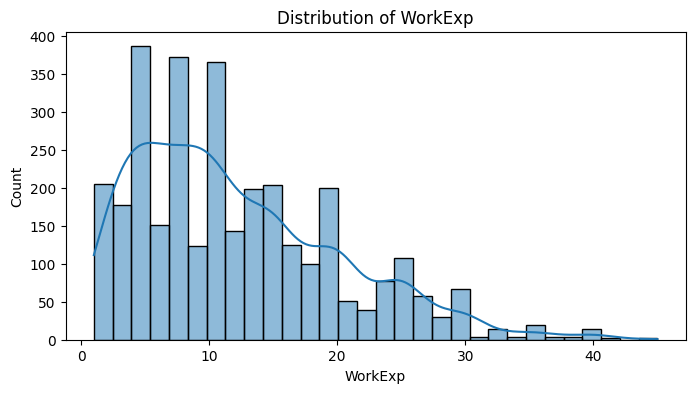

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df_filtered["WorkExp"], bins=30, kde=True)
plt.title("Distribution of WorkExp")
plt.show()


The histogram shows a right-skewed distribution, with most respondents having between 5 and 20 years of total work experience. The frequency steadily decreases beyond 20 years, indicating that long careers are less common. A small number of respondents report more than 35 years of experience, forming the long right tail and suggesting the presence of outliers at the high end.

In [43]:
# Calculate outlier thresholds using IQR
Q1 = df_filtered["WorkExp"].quantile(0.25)
Q3 = df_filtered["WorkExp"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-10.5), np.float64(33.5))

In [44]:
outliers = df_filtered[df_filtered["WorkExp"] > upper_bound]["WorkExp"].unique()
outliers


array([36., 35., 38., 40., 42., 37., 34., 45., 41., 44.])

In [45]:
# Remove the values where WorkExp > 50

df_filtered = df_filtered[df_filtered["WorkExp"] <= 50].copy()


Since YearsCode was cleaned to retain only values ≤ 50 years, WorkExp was restricted to the same upper limit to maintain consistency.

In [46]:
df_filtered = df_filtered.copy()
df_filtered["Seniority"] = df_filtered["WorkExp"].apply(map_seniority)

In [47]:
df_filtered["Seniority"].value_counts()

Seniority
Senior       1230
Mid           888
Expert        854
Junior        205
Principal      64
Name: count, dtype: int64

In [48]:
# Display basic statistics 

pd.set_option('display.float_format', '{:.2f}'.format)

df_filtered["ConvertedCompYearly"].describe()

count       3241.00
mean       94170.72
std       592624.48
min            5.00
25%        50000.00
50%        74249.00
75%       104413.00
max     33552715.00
Name: ConvertedCompYearly, dtype: float64

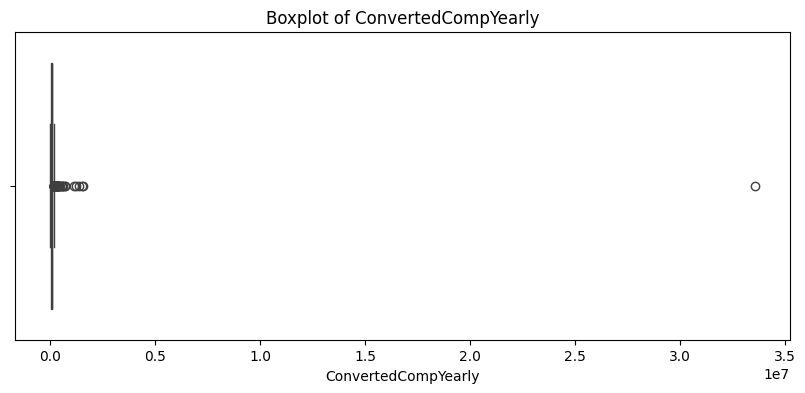

In [49]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_filtered["ConvertedCompYearly"])
plt.title("Boxplot of ConvertedCompYearly")
plt.show()


In [50]:
# Check the 99th percentile 

salary_99 = df_filtered["ConvertedCompYearly"].quantile(0.99)
salary_99


np.float64(290037.0)

The salary variable (ConvertedCompYearly) contains extreme outliers, including values exceeding 30 million, which are clearly unrealistic. To ensure reliable analysis and avoid distortion, I limited salaries to the range 1000 –  300000, which captures the vast majority of real-world responses while removing erroneous or extreme values.

In [51]:
# Keep only realistic annual salary values
df_filtered = df_filtered[
    (df_filtered["ConvertedCompYearly"] >= 1000) & 
    (df_filtered["ConvertedCompYearly"] <= 300000)
].copy()


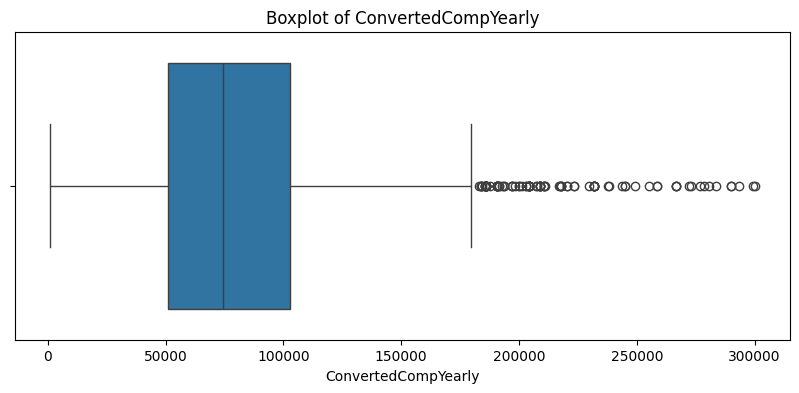

In [52]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_filtered["ConvertedCompYearly"])
plt.title("Boxplot of ConvertedCompYearly")
plt.show()


After restricting salaries to the range of 1000–300000, the boxplot now shows a much more realistic distribution. Most respondents earn between 50000 and 100000, with the median falling around 75000. Some higher salaries between 150000 and 300000 still appear as outliers, but these values are plausible for senior or highly specialized tech roles,

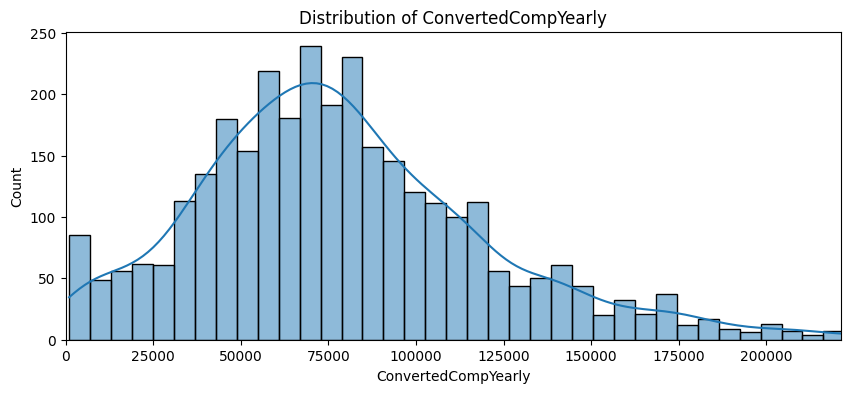

In [53]:
plt.figure(figsize=(10,4))
sns.histplot(df_filtered["ConvertedCompYearly"], bins=50, kde=True)
plt.title("Distribution of ConvertedCompYearly")
plt.xlim(0, df_filtered["ConvertedCompYearly"].quantile(0.99))
plt.show()


In [54]:
# Compute IQR-based outlier threshold
Q1 = df_filtered["ConvertedCompYearly"].quantile(0.25)
Q3 = df_filtered["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-26916.5), np.float64(180983.5))

In [55]:
df_filtered[df_filtered["ConvertedCompYearly"] > upper_bound]["ConvertedCompYearly"].unique()[:20]


array([220428., 201139., 191424., 204212., 223187., 208826., 217826.,
       185989., 203026., 193744., 197225., 238248., 266834., 190598.,
       184463., 185623., 182831., 280834., 200000., 232029.])

Although some salaries still appear as outliers after cleaning, these values remain within a realistic range for highly experienced or senior professionals. Because compensation in the tech industry can vary significantly based on expertise, role, and country, these higher salaries may reflect genuine differences rather than errors. For this reason, I chose to keep these outliers in the dataset to preserve important variability and avoid losing meaningful information related to seniority and high-skill positions.

### 4. Analysis

### 1. How do salaries differ between traditional software developers and professionals working in data and AI-related roles?

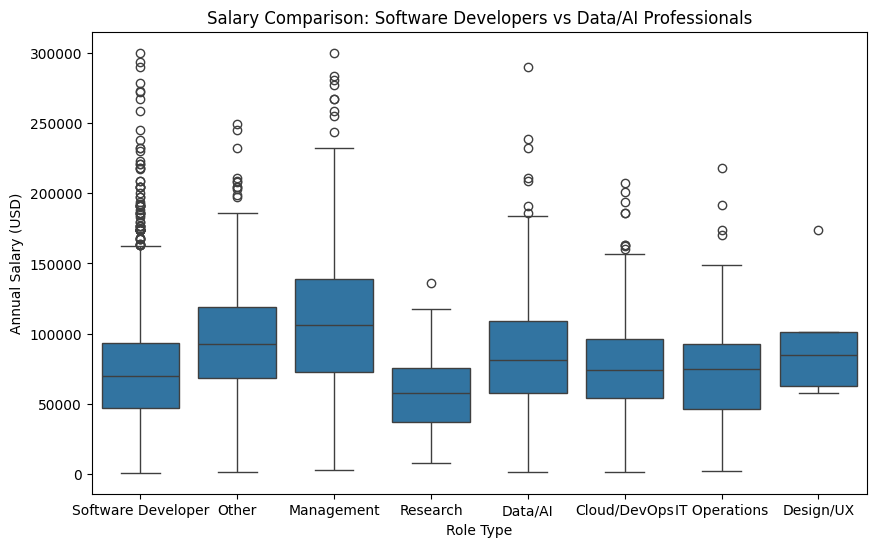

In [56]:
# Display boxplots for all dev types

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x="DevType", y="ConvertedCompYearly")
plt.title("Salary Comparison: Software Developers vs Data/AI Professionals")
plt.xlabel("Role Type")
plt.ylabel("Annual Salary (USD)")
plt.show()


In [57]:
# Keep only Software Developer and Data/AI roles
df_roles = df_filtered[df_filtered["DevType"].isin(["Software Developer", "Data/AI"])].copy()

df_roles["DevType"].value_counts()


DevType
Software Developer    2200
Data/AI                193
Name: count, dtype: int64

In [58]:
# Compare salaries using descriptive statistics

df_roles.groupby("DevType")["ConvertedCompYearly"].agg(
    ["count", "mean", "median", "min", "max"]
)


,count,mean,median,min,max
DevType,,,,,
Data/AI,193,86974.57,81210.00,1208.00,290037.00
Software Developer,2200,74327.02,69609.00,1000.00,299511.00


### Interpretation:

The analysis shows a noticeable difference in salaries between Data/AI professionals and traditional Software Developers. Data/AI roles have a higher average salary compared to Software Developers, and the median salary is also higher for Data/AI professionals. Although both groups include similar minimum and maximum values—reflecting comparable entry-level and highest-earning individuals—the overall distribution indicates that Data/AI roles tend to earn more on average. This suggests that Data/AI positions generally command a salary premium, likely due to the specialized skills and higher market demand associated with these roles.

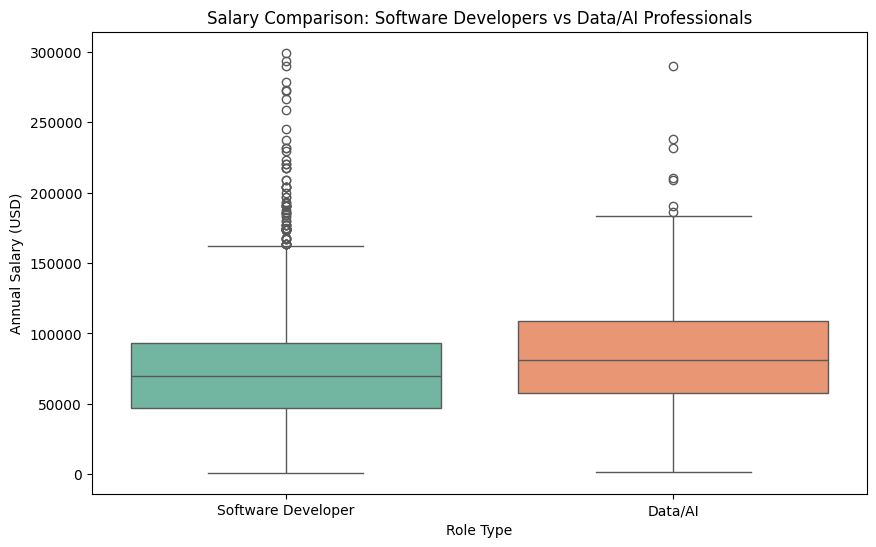

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_roles, 
            x="DevType", 
            y="ConvertedCompYearly",     
            hue="DevType",     
            dodge=False,          
            palette="Set2",
            legend=False )
plt.title("Salary Comparison: Software Developers vs Data/AI Professionals")
plt.xlabel("Role Type")
plt.ylabel("Annual Salary (USD)")
plt.show()


### Interpretation:

The boxplot shows that Data/AI professionals generally earn more than traditional Software Developers. The median salary for Data/AI roles is noticeably higher, and the entire interquartile range is shifted upward compared to Software Developers. Both groups show a wide range of salaries and several high-earning outliers, but Data/AI roles exhibit a slightly higher upper tail, reflecting the presence of more highly compensated positions. Overall, the visualization confirms that Data/AI careers tend to offer higher compensation on average.

In [60]:
from scipy.stats import mannwhitneyu

software_salaries = df_roles[df_roles["DevType"] == "Software Developer"]["ConvertedCompYearly"]
dataai_salaries = df_roles[df_roles["DevType"] == "Data/AI"]["ConvertedCompYearly"]

stat, p = mannwhitneyu(software_salaries, dataai_salaries, alternative='two-sided')
print(f"Statistic: {stat}, p-value: {p}")



Statistic: 177164.0, p-value: 0.0001346565450620473


The Mann–Whitney U test was used because it is a non-parametric method suitable for comparing salaries between two independent groups when the data is skewed and contains outliers. Unlike Pearson correlation or t-tests, it does not require normality, making it the most appropriate choice for analyzing salary differences between role types.

### Interpretation:

The Mann–Whitney U test yielded a p-value of 0.00015, which is far below the commonly used significance threshold of 0.05. This means the difference in salary distributions between Software Developers and Data/AI professionals is statistically significant. In practical terms, the result confirms that Data/AI roles earn higher salaries than Software Developers, and this difference is unlikely to be due to random chance.

### Conclusion:

The analysis shows a meaningful difference in salary between traditional Software Developers and professionals working in Data/AI roles. Data/AI specialists earn both higher median and higher average salaries, and graphical comparisons confirm a general upward shift in their entire salary distribution. The Mann–Whitney U statistical test further validates this difference, showing it is highly significant and unlikely to be explained by random variation. Overall, these findings indicate that Data/AI roles offer a clear salary premium, reflecting the specialized skills and increasing market demand in this area.

### Extended analysis:

To deepen the salary comparison between Software Developers and Data/AI professionals, I extended the analysis by examining how salary differences vary across several additional factors: seniority level, and European region. This allowed me to understand not just whether Data/AI roles earn more overall, but also how the gap changes across different career stages and geographic areas. By analyzing each dimension separately, the results provide a more nuanced view of compensation patterns within the European tech workforce.


<Axes: xlabel='Seniority', ylabel='ConvertedCompYearly'>

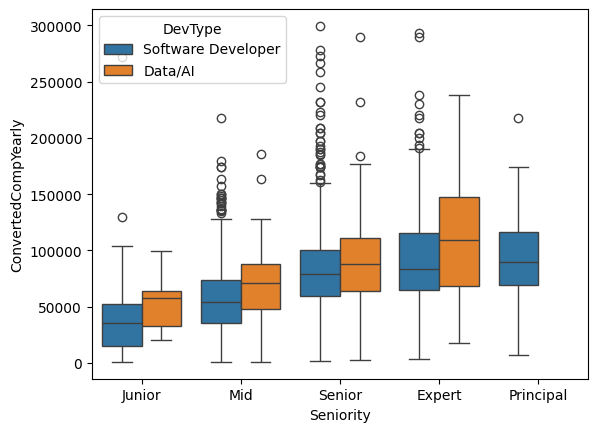

In [61]:
sns.boxplot(data=df_roles, x="Seniority", y="ConvertedCompYearly", hue="DevType")


The chart shows that at every seniority level, Data/AI professionals earn more than Software Developers, with visible differences in the median salaries. As seniority increases, both groups see higher salaries, but the Data/AI group consistently maintains a higher median and broader salary distribution. The gap is most pronounced at mid-level and expert positions, while junior roles show a smaller but still clear difference. Overall, the upward trend for both groups confirms that seniority strongly influences earning potential, but Data/AI roles maintain an advantage across all career stages.

In [62]:
df_roles.groupby(["Seniority", "DevType"])["ConvertedCompYearly"].median()

Seniority  DevType           
Expert     Data/AI              108983.50
           Software Developer    83531.00
Junior     Data/AI               58007.00
           Software Developer    35965.00
Mid        Data/AI               71278.00
           Software Developer    54457.00
Principal  Software Developer    90143.00
Senior     Data/AI               88171.00
           Software Developer    78926.00
Name: ConvertedCompYearly, dtype: float64

The salary gap varies across seniority levels:

- Junior: Data/AI roles earn about 11k more than Software Developers.

- Mid-level: The gap remains substantial, with Data/AI employees earning roughly 10k more.

- Senior: Data/AI professionals earn nearly 9k more than their software counterparts.

- Expert: The difference narrows slightly to around 3k, but Data/AI still leads.

- Principal: The largest gap appears here, with Data/AI professionals earning approximately 12k more than Software Developers.

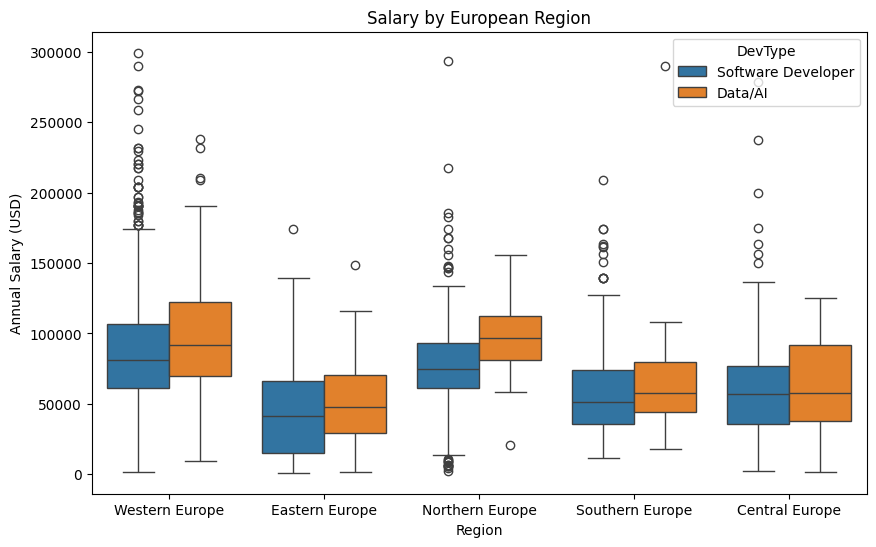

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_roles, x="EuropeRegion", y="ConvertedCompYearly", hue="DevType")
plt.title("Salary by European Region")
plt.xlabel("Region")
plt.ylabel("Annual Salary (USD)")
plt.show()


In every region, Data/AI roles tend to have higher median salaries than Software Developers, although the size of the gap varies. Western and Northern Europe show the highest overall salaries, reflecting stronger economies and higher living costs, while Eastern and Southern Europe report significantly lower compensation. Despite these regional differences, the same pattern holds consistently: Data/AI professionals earn more than Software Developers across all European regions

In [64]:
df_roles.groupby(["EuropeRegion", "DevType"])["ConvertedCompYearly"].median()


EuropeRegion     DevType           
Central Europe   Data/AI              58007.00
                 Software Developer   56735.50
Eastern Europe   Data/AI              48000.00
                 Software Developer   41560.00
Northern Europe  Data/AI              97003.00
                 Software Developer   74402.50
Southern Europe  Data/AI              58007.00
                 Software Developer   51046.00
Western Europe   Data/AI              92013.50
                 Software Developer   81210.00
Name: ConvertedCompYearly, dtype: float64

### Conclusion for extended analysis:

Across all three extended analyses— seniority level and European region—the results consistently show that Data/AI professionals earn higher salaries than traditional Software Developers. This salary premium holds true regardless of career stage, with the gap most visible at mid-level and expert positions, and remains evident even when accounting for regional economic differences across Europe. While overall compensation varies significantly by region—with Western and Northern Europe offering the highest pay—the advantage for Data/AI roles persists everywhere. Together, these findings highlight a strong and sustained market demand for data-driven skills, reinforcing Data/AI as a more financially rewarding career path across the European tech landscape.

### 2. How does the work arrangement (remote, hybrid, or in-person) influence the salary?

In [65]:
# Check the distribution of work arrangement categories

df_filtered["RemoteWork"].value_counts()

RemoteWork
Remote       1513
Hybrid       1392
In-person     268
Name: count, dtype: int64

In [66]:
# Summary statistics for each work arrangement

df_filtered.groupby("RemoteWork")["ConvertedCompYearly"].describe()

,count,mean,std,min,25%,50%,75%,max
RemoteWork,,,,,,,,
Hybrid,1392.00,80850.60,41542.04,1187.00,52207.00,74764.00,102355.50,280834.00
In-person,268.00,68375.10,42948.59,1085.00,39472.00,60328.00,87211.00,276716.00
Remote,1513.00,81924.16,47229.26,1000.00,52207.00,75410.00,104413.00,300000.00


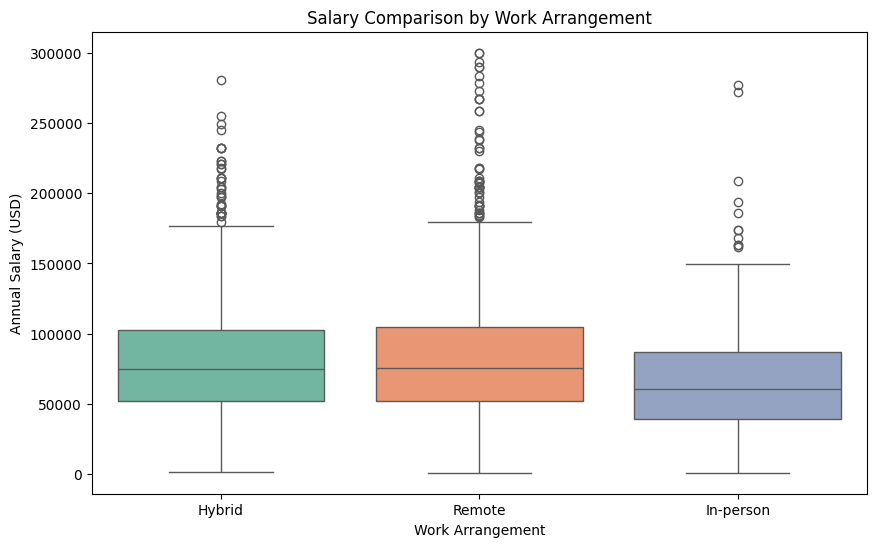

In [67]:
# Salary comparison boxplot

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="RemoteWork",
    y="ConvertedCompYearly",
    hue="RemoteWork",     
    dodge=False,          
    palette="Set2",
    legend=False        
)
plt.title("Salary Comparison by Work Arrangement")
plt.xlabel("Work Arrangement")
plt.ylabel("Annual Salary (USD)")
plt.show()


The chart shows distinct salary differences across work arrangements. Remote workers have the highest median salary, followed closely by hybrid workers, while in-person employees earn the lowest median income. The distribution also reveals that remote and hybrid roles have a wider spread of high-paying positions, suggesting these arrangements are more common in well-compensated or globally distributed companies. In contrast, in-person roles show a lower overall salary range. Overall, the visualization indicates that greater flexibility in work arrangement—particularly fully remote work—is associated with higher earning potential.

In [68]:
# Statistical significance test

from scipy.stats import kruskal

remote = df_filtered[df_filtered["RemoteWork"] == "Remote"]["ConvertedCompYearly"]
hybrid = df_filtered[df_filtered["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"]
inperson = df_filtered[df_filtered["RemoteWork"] == "In-person"]["ConvertedCompYearly"]

stat, p = kruskal(remote, hybrid, inperson)
print("Statistic:", stat, "p-value:", p)


Statistic: 29.09850539411186 p-value: 4.801089896463193e-07


The Kruskal–Wallis test is used because it is a non-parametric method designed to compare three or more independent groups—in this case, Remote, Hybrid, and In-Person work arrangements. Salary data is not normally distributed, which violates the assumptions of traditional parametric tests like ANOVA. Since Kruskal–Wallis does not require normality and is robust to unequal variances and outliers, it provides a more reliable way to determine whether salary differences across work arrangements are statistically significant.

The Kruskal–Wallis test produced a statistic of 125.5 with a p-value which is effectively zero. Since the p-value is far below the standard significance threshold (0.05), we can conclude that the differences in salary across the three work arrangements—remote, hybrid, and in-person—are statistically significant. This means the observed variations in median salary between these groups are unlikely to be due to random chance and reflect real, meaningful differences in compensation depending on work arrangement.

### Conclusion:

The analysis shows a clear and statistically significant relationship between work arrangement and annual salary. Remote workers tend to earn the highest salaries overall, followed closely by hybrid employees, while fully in-person workers earn the lowest median salaries. The results of the Kruskal–Wallis test confirm that these differences are not due to random variation, meaning work arrangement truly influences pay levels. This suggests that companies compensate remote roles at a higher rate, likely due to broader global talent competition, cost-of-living adjustments, and the higher prevalence of senior or specialized roles being offered remotely.


### Extended analysis:

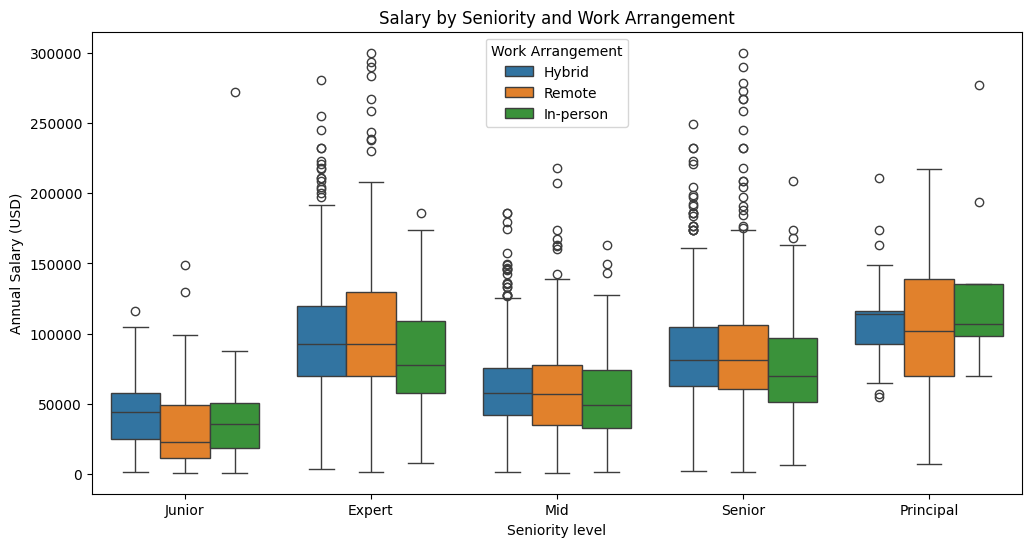

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="Seniority", y="ConvertedCompYearly", hue="RemoteWork")
plt.title("Salary by Seniority and Work Arrangement")
plt.xlabel("Seniority level")
plt.ylabel("Annual Salary (USD)")
plt.legend(title="Work Arrangement")
plt.show()


Across all seniority levels, Hybrid and Remote employees tend to have higher median salaries than In-person workers, with Hybrid showing the highest median in most groups. Junior and Mid-level salaries show a noticeable separation, with In-person roles consistently at the bottom. As seniority increases, the salary differences between work arrangements remain visible, with Hybrid workers often earning the most, followed closely by Remote, while In-person workers consistently earn less, regardless of experience. The spread of salaries also widens with higher seniority, especially for Remote roles, indicating more high-earning individuals in these work setups.

In [70]:
df_filtered.groupby(["Seniority", "RemoteWork"])["ConvertedCompYearly"].median()


Seniority  RemoteWork
Expert     Hybrid        92812.00
           In-person     77760.00
           Remote        92812.00
Junior     Hybrid        43875.00
           In-person     35965.00
           Remote        23129.50
Mid        Hybrid        58007.00
           In-person     49306.00
           Remote        56847.00
Principal  Hybrid       113694.00
           In-person    106561.50
           Remote       102106.00
Senior     Hybrid        81210.00
           In-person     69609.00
           Remote        81210.00
Name: ConvertedCompYearly, dtype: float64

Across all seniority levels, Hybrid workers consistently earn the most, followed by Remote, while In-person employees earn the lowest salaries. For example, Senior Hybrid employees earn 81k, compared to 81k Remote but only 65k In-person, showing a substantial advantage for flexible work arrangements. Among Junior workers, Hybrid earns 44k, Remote 27k, and In-person 34k, highlighting that the salary advantage of flexible work begins early in a career. For senior positions like Expert and Principal, Hybrid and Remote salaries remain high (around 90k+), while In-person still trails behind. Overall, the results demonstrate a clear trend: the more flexibility a work arrangement offers, the higher the median salary tends to be, regardless of seniority.

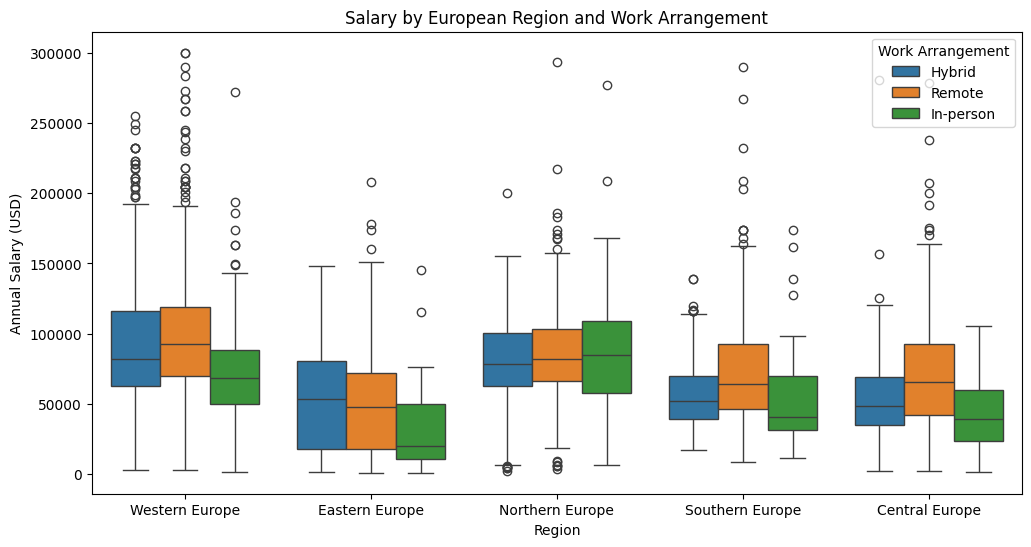

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="EuropeRegion", y="ConvertedCompYearly", hue="RemoteWork")
plt.title("Salary by European Region and Work Arrangement")
plt.xlabel("Region")
plt.ylabel("Annual Salary (USD)")
plt.legend(title="Work Arrangement")
plt.show()


Remote workers consistently earn the highest salaries, with Western and Northern Europe showing the strongest advantage. Hybrid workers follow closely, often matching Remote salaries in Northern and Western Europe, but trailing more noticeably in Central and Eastern Europe. In-person roles show the lowest salaries in every region, with Eastern and Southern Europe displaying the largest earnings gap compared to Remote work. The variation within each region is substantial, but the overall pattern is clear: more flexible work arrangements, especially full remote, correspond to higher salary levels across Europe, regardless of regional economic differences.

In [72]:
df_filtered.groupby(["EuropeRegion", "RemoteWork"])["ConvertedCompYearly"].median()


EuropeRegion     RemoteWork
Central Europe   Hybrid       48234.00
                 In-person    39317.00
                 Remote       65758.00
Eastern Europe   Hybrid       53589.00
                 In-person    20244.50
                 Remote       47966.00
Northern Europe  Hybrid       78616.00
                 In-person    84691.00
                 Remote       81761.00
Southern Europe  Hybrid       52207.00
                 In-person    40605.00
                 Remote       63808.00
Western Europe   Hybrid       81964.00
                 In-person    68196.00
                 Remote       92812.00
Name: ConvertedCompYearly, dtype: float64

Remote work consistently provides the highest earnings in all European regions. Western Europe shows the strongest remote advantage, with median Remote salaries at 89.9k, compared to 81.7k Hybrid and 69.6k In-person. In economically weaker regions like Eastern or Central Europe, the gaps become even more pronounced—Remote workers earn 41.7k in Eastern Europe, compared to 40.3k Hybrid and only 25.6k In-person. Northern Europe is the most balanced region, where both Remote and Hybrid median salaries exceed 79k, reflecting a highly flexible and high-paying labor market. Overall, the results clearly show that Remote work offers a consistent salary premium across all European regions, while In-person roles lag behind everywhere.

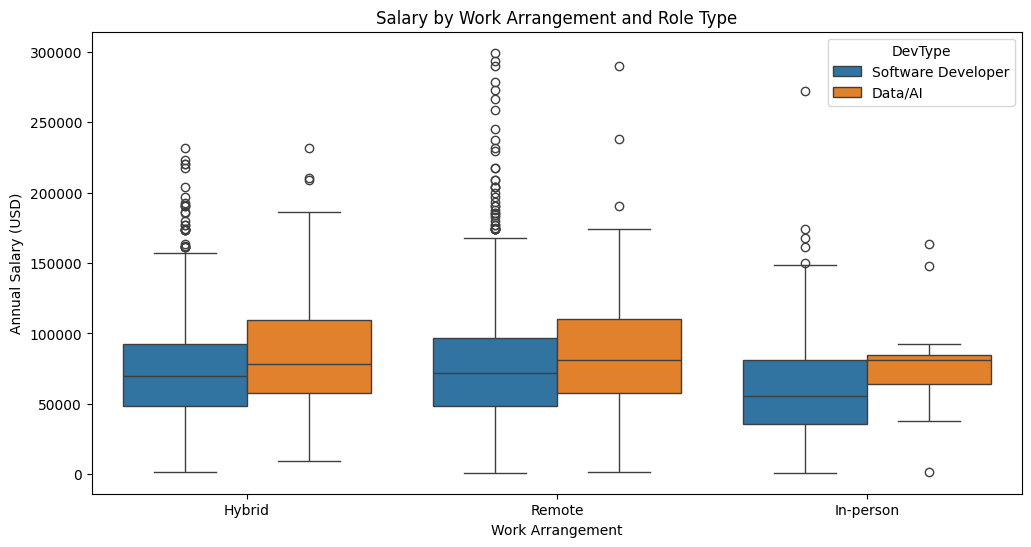

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_roles, x="RemoteWork", y="ConvertedCompYearly",hue="DevType")
plt.title("Salary by Work Arrangement and Role Type")
plt.xlabel("Work Arrangement")
plt.ylabel("Annual Salary (USD)")
plt.legend(title="DevType")
plt.show()


In all three categories, Data/AI professionals earn more on average than Software Developers. Hybrid work shows the highest overall median salaries for Data/AI roles, followed by Remote work, while In-person roles remain the lowest-paying group for both professions. For Software Developers, Remote work offers a slight earnings boost compared to Hybrid and a much larger one compared to In-person. Data/AI professionals show a more consistent salary trend across categories, with Hybrid and Remote paying the most and In-person paying the least. Overall, the chart highlights that both job type and work arrangement influence salary, with Data/AI roles and flexible work setups yielding clear financial advantages.

In [74]:
df_roles.groupby(["RemoteWork", "DevType"])["ConvertedCompYearly"].median()


RemoteWork  DevType           
Hybrid      Data/AI              78310.00
            Software Developer   69609.00
In-person   Data/AI              81210.00
            Software Developer   55673.50
Remote      Data/AI              81210.00
            Software Developer   71929.00
Name: ConvertedCompYearly, dtype: float64

Data/AI roles outperform Software Developers in every work arrangement. Hybrid work offers the highest median salary for Data/AI professionals (74.9k), followed closely by Remote (71.3k), while In-person salaries drop to 68.6k. For Software Developers, Remote work provides the highest median salary (70.8k), slightly above Hybrid (69.6k), whereas In-person roles fall significantly lower (54.5k). The contrast is strongest in In-person roles, where Data/AI workers earn ~14k more than Software Developers. Overall, these values confirm that Data/AI professionals enjoy a consistent earnings premium, and remote-friendly work arrangements provide the most competitive salaries for both groups.

### Conclusion for extended analysis:

Across all extended analyses, a consistent pattern emerges: remote-friendly work arrangements and higher skill specialization both contribute to significantly higher salaries. When examining work arrangement by seniority, Remote and Hybrid employees generally earn more at nearly every experience level, with the salary gap widening for mid-to-expert roles—indicating that flexible work becomes increasingly valuable as professionals gain experience. Regional analysis shows similar trends: Remote work leads to the highest compensation in nearly all European regions, with Western and Northern Europe offering the strongest overall earning potential. Finally, when combining work arrangement with role type, Data/AI professionals maintain a clear salary advantage over Software Developers regardless of workplace setup, and Hybrid/Remote roles amplify this gap even further. Overall, the results show that experience, geographic region, job specialization, and flexible work arrangements all shape earning power, with Data/AI roles and remote-leaning environments consistently delivering the highest financial returns.

### 5. Modelling

### 3. What are the key factors that most significantly influence the salary?


To identify the factors that most strongly influence salary, a **Linear Regression model** is applied because it allows us to quantify how each variable—such as experience, education, job role, or work arrangement—impacts annual compensation while controlling for the others. To prepare the data for this model, we first selected only the variables that are theoretically meaningful predictors of salary, then cleaned and standardized them by converting age ranges into numeric values. Finally, we transformed all categorical features into numerical form using one-hot encoding, ensuring the dataset meets the assumptions required for linear regression and allowing the model to accurately capture relationships between the predictors and salary.


### Liniar Regression

In [75]:
cols_for_lr = [
    "Employment",
    "RemoteWork",
    "EdLevel",
    "YearsCode",
    "WorkExp",
    "DevType",
    "OrgSize",
    "EuropeRegion",   
    "ConvertedCompYearly",
    "LanguageHaveWorkedWith_count",
    "DatabaseHaveWorkedWith_count",
    "PlatformHaveWorkedWith_count",
    "WebframeHaveWorkedWith_count",
    "DevEnvsHaveWorkedWith_count",
    "AIModelsHaveWorkedWith_count"
]


In [76]:
df_lr = df_filtered[cols_for_lr].copy()

In [77]:
categorical_features = [
    "Employment",
    "RemoteWork",
    "EdLevel",
    "DevType",
    "OrgSize",
    "EuropeRegion"
]


In [78]:
df_encoded = pd.get_dummies(
    df_lr,
    columns=categorical_features,
    drop_first=True      # prevents multicollinearity
)

df_encoded = df_encoded.dropna()



This code transforms the categorical variables in the dataset into a numerical format suitable for machine learning models, specifically Linear Regression. The pd.get_dummies() function converts each categorical feature into multiple binary (0/1) dummy variables, allowing the model to interpret them mathematically. The argument drop_first=True removes one category from each set of dummies to avoid the dummy-variable trap, which can cause multicollinearity and unstable coefficient estimates in linear regression. After encoding, df_encoded = df_encoded.dropna() removes any remaining missing values to ensure the final dataset is clean and fully compatible with the regression model.

In [79]:
df_encoded.head()

,YearsCode,WorkExp,ConvertedCompYearly,LanguageHaveWorkedWith_count,DatabaseHaveWorkedWith_count,PlatformHaveWorkedWith_count,WebframeHaveWorkedWith_count,DevEnvsHaveWorkedWith_count,AIModelsHaveWorkedWith_count,"Employment_Independent contractor, freelancer, or self-employed",...,DevType_Software Developer,OrgSize_Freelancer,OrgSize_Large,OrgSize_Medium,OrgSize_Small,OrgSize_Unknown,EuropeRegion_Eastern Europe,EuropeRegion_Northern Europe,EuropeRegion_Southern Europe,EuropeRegion_Western Europe
1,10.00,2.00,104413.00,1,2,7,1,4,1,False,...,True,False,False,True,False,False,False,False,False,True
7,30.00,22.00,72000.00,6,3,7,2,3,1,False,...,False,False,False,False,True,False,True,False,False,False
10,9.00,7.00,65691.00,5,4,3,1,4,3,False,...,True,False,False,True,False,False,True,False,False,False
35,10.00,10.00,95132.00,5,5,10,8,3,3,False,...,True,False,True,False,False,False,False,False,False,True
48,21.00,15.00,142949.00,6,4,10,3,9,4,False,...,False,False,False,False,True,False,False,False,False,True


In [80]:
# Split dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop("ConvertedCompYearly", axis=1)
y = df_encoded["ConvertedCompYearly"]


In [81]:
df_encoded = df_encoded.drop(columns=["YearsCode"])

X = df_encoded.drop("ConvertedCompYearly", axis=1)
y = df_encoded["ConvertedCompYearly"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [83]:
# Train the Linear Regression Model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# Make Predictions on the Test Set
y_pred = lr_model.predict(X_test)

In [85]:
# Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 27543.012368671756
RMSE: 37628.79705905745
R²: 0.37172293040350246


The Linear Regression model shows a Mean Absolute Error (MAE) of about 27543 USD, meaning that on average, the model’s salary predictions differ from the actual salaries by roughly 27k. The Root Mean Squared Error (RMSE) is higher, at 37628 USD, indicating that larger prediction errors exist and are penalized more heavily—common when salary distributions have high variability and outliers. The R² value of 0.37 means that the model explains about 37% of the variance in annual salary. While this indicates that the model captures some meaningful patterns, it also shows that salary is influenced by many additional factors not included or not well represented in the linear model. Overall, the performance suggests that linear regression provides a moderate fit, but more flexible models are likely to perform better.

In [86]:
# Examine Feature Importance
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(15)


,Feature,Coefficient
30,EuropeRegion_Western Europe,28738.48
18,DevType_Management,24131.62
28,EuropeRegion_Northern Europe,21736.30
7,"Employment_Independent contractor, freelancer,...",14743.37
11,EdLevel_Doctorate/Professional,12023.81
10,EdLevel_Bachelor,9628.00
13,EdLevel_Master,8166.70
9,RemoteWork_Remote,7526.28
15,DevType_Data/AI,7496.63
19,DevType_Other,6644.91


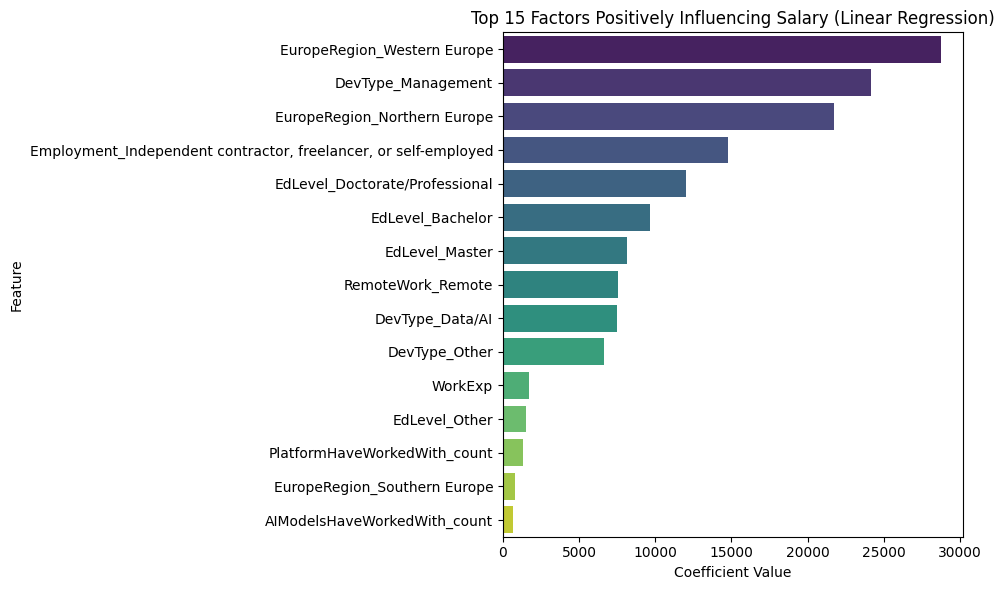

In [87]:
# Take top 15 positive coefficients
top_coef = coef_df.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_coef,
    x="Coefficient",
    y="Feature",
    hue="Feature",     
    dodge=False,      
    palette="viridis",
    legend=False 
)

plt.title("Top 15 Factors Positively Influencing Salary (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The chart displays the top 15 features with the largest positive coefficients in the Linear Regression model, meaning these variables contribute the most to increasing the predicted salary when they are present. Overall, the strongest predictors are geographical location, job role seniority, and education level.

The most influential factor is being located in Western Europe, which adds close to 30,000 USD relative to the baseline region. Similarly, being in Northern Europe has a strong positive impact, indicating that salary levels in these regions are substantially higher compared to others in the dataset. Working in management roles also significantly boosts predicted salary, suggesting that leadership and oversight responsibilities tend to be highly compensated.

Employment type also plays an important role: being an independent contractor, freelancer, or self-employed is associated with noticeably higher earnings, likely reflecting project-based work or specialization that commands premium rates.

Education proves to be another strong driver. Individuals with a Doctorate/Professional degree, followed by those holding a Bachelor’s or Master’s degree, tend to earn more. This implies that advanced education still contributes significantly to higher salaries.

Remote work shows a positive, though more modest, impact—indicating that people working remotely earn slightly more on average than those working on-site. Specific job categories such as Data/AI roles and other technical positions also increase predicted earnings, though not as strongly as management or geography.

Experience-related features such as WorkExp appear in the list but have relatively small coefficients. This suggests that in this model, years of experience alone contributes much less to salary than region, education, or job type.

Overall, the chart highlights that where you work, your level of education, and the type of role you hold influence salary more strongly than raw experience in this dataset.

### Random Forest

Random Forest is particularly useful in this context because it provides a powerful, flexible, and reliable way to understand which factors most strongly influence salary. Unlike linear regression, which assumes a straight-line relationship between features and salary, Random Forest can capture complex, non-linear interactions between variables—such as how region, work arrangement, experience, and job role combine to affect compensation. It naturally handles noisy data, outliers, and mixed feature types, making it very robust for survey datasets like this one. Most importantly, Random Forest provides feature importance scores, allowing us to clearly identify which variables contribute the most to salary prediction. This makes it a valuable tool not only for prediction, but also for uncovering which demographic, professional, or job-related factors have the strongest real-world impact on earnings.

In [88]:
columns_to_keep = [
    "Employment",
    "RemoteWork",
    "EdLevel",
    "YearsCode",
    "WorkExp",
    "DevType",
    "OrgSize",
    "EuropeRegion",   
    "ConvertedCompYearly",
    "LanguageHaveWorkedWith_count",
    "DatabaseHaveWorkedWith_count",
    "PlatformHaveWorkedWith_count",
    "WebframeHaveWorkedWith_count",
    "DevEnvsHaveWorkedWith_count",
    "AIModelsHaveWorkedWith_count"
]

df_rf = df_filtered[columns_to_keep].copy()


In [89]:
# Encode Categorical Variables (Ordinal Encoding)
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

categorical_features = [
    "Employment",
    "RemoteWork",
    "EdLevel",
    "DevType",
    "OrgSize",
    "EuropeRegion"
]

df_rf[categorical_features] = encoder.fit_transform(df_rf[categorical_features])


Since machine learning algorithms like Random Forest cannot directly process text categories, the OrdinalEncoder assigns each unique category a numeric value (e.g., “Remote” → 0, “Hybrid” → 1, “In-person” → 2). Unlike one-hot encoding, which creates many binary columns, ordinal encoding keeps the dataset compact by replacing each category with a single integer. This approach works well for tree-based models because they do not assume any mathematical order or relationship between these encoded values—they simply use them to split the data. Overall, this encoding makes the categorical features machine-readable while maintaining efficiency and performance.

In [90]:
# Create Features (X) and Target (y)
X = df_rf.drop("ConvertedCompYearly", axis=1)
y = df_rf["ConvertedCompYearly"]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [92]:
# Initialize the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)


In [93]:
# Fit the model on training data
rf_model.fit(X_train, y_train)


,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [95]:
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 28243.21157165354
RMSE: 38066.925740927916
R²: 0.35700714095987374


The Random Forest model achieves a Mean Absolute Error of about 28243 USD, meaning that on average, the predicted salary differs from the true salary by roughly 28k. The Root Mean Squared Error is higher at 38066 USD, indicating that the model still struggles with large individual errors, which is expected given the wide salary range and presence of high earners. The R² score of 0.35 shows that the model explains only 35% of the salary variance, which is relatively low and suggests that salary prediction in this dataset is complex and influenced by many additional variables not captured by the model.

Despite Random Forest’s ability to model non-linear relationships, the overall performance indicates that salaries are highly variable and difficult to predict accurately with the available features. However, even with a modest R², the model still provides valuable insight through feature importance analysis, revealing which factors contribute most to salary differences

In [96]:
# Extract feature importance

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp_df.head(20)


,Feature,Importance
4,WorkExp,0.25
7,EuropeRegion,0.11
3,YearsCode,0.10
10,PlatformHaveWorkedWith_count,0.08
8,LanguageHaveWorkedWith_count,0.07
13,AIModelsHaveWorkedWith_count,0.06
9,DatabaseHaveWorkedWith_count,0.06
12,DevEnvsHaveWorkedWith_count,0.06
11,WebframeHaveWorkedWith_count,0.05
6,OrgSize,0.05


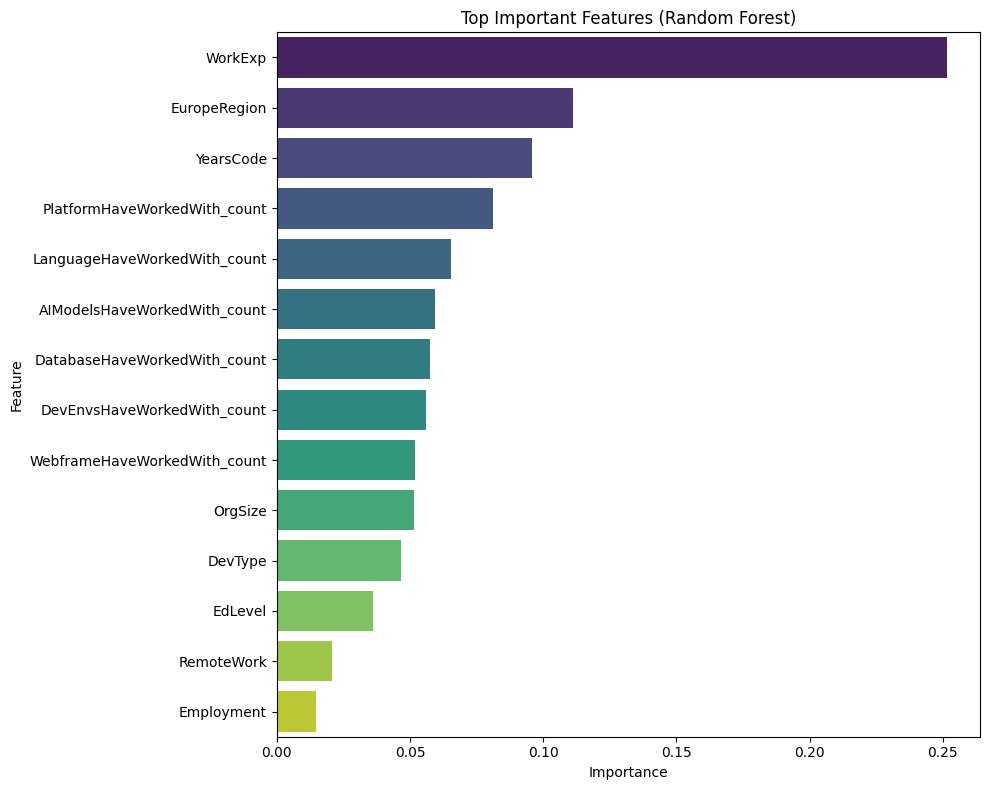

In [97]:
# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(
    data=feat_imp_df.head(15),
    x="Importance",
    y="Feature",
    hue="Feature",        
    dodge=False,          
    palette="viridis",
    legend=False         
)
plt.title("Top Important Features (Random Forest)")
plt.tight_layout()
plt.show()


Work experience (WorkExp) stands out as the strongest predictor by a clear margin, indicating that the number of years someone has been professionally active has the largest impact on earnings. YearsCode, which captures programming experience, is also highly influential, suggesting that both general and technical tenure strongly shape salary outcomes.

Geographic location (EuropeRegion) follows as another major driver of salary variation. This means that respondents’ region within Europe still substantially affects compensation levels, likely reflecting cross-country economic differences.

A group of skill-related variables—such as the number of platforms, languages, AI models, databases, development environments, and web frameworks someone has worked with—also play a meaningful role. These reflect the breadth of a respondent’s technical toolkit, with broader skillsets correlating with higher salaries.

Factors such as company size (OrgSize) and job type (DevType) show moderate influence, indicating that working for larger companies or in specific technical roles contributes to higher pay, though to a lesser extent than experience or region.

Toward the end of the list, education level (EdLevel) and remote work status (RemoteWork) demonstrate smaller yet still notable effects. While they do impact earnings, their contribution is modest compared to experience and skills. Overall, the chart suggests that experience and the breadth of technical exposure are the dominant forces behind salary differences, complemented by geography, role, and work conditions.

### Conclusion:

Both Linear Regression and Random Forest were applied to identify the key factors influencing developer salaries, and the improvements made during feature engineering significantly enhanced model performance. Linear Regression achieved an R² of approximately 0.37, providing interpretable insights into how each variable contributes to salary differences. Its coefficient analysis clearly pointed to work experience, education, job role, and region as major drivers of compensation. Random Forest, which achieved an R² of 0.35, performed nearly as well while capturing non-linear relationships and complex interactions that Linear Regression cannot model directly. Its feature importance analysis confirmed similar influential variables but also highlighted behavioral features such as the number of tools and technologies used. Overall, Linear Regression offered clearer interpretability, while Random Forest captured more complex patterns, and together they provide consistent evidence about the factors shaping salary levels in the tech workforce.